In [7]:
# --- Step 1: Train and Compare 6 ML Models for Visa Recommendation ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load dataset
data = pd.read_csv("preprocessed_dataset.csv")

# Drop missing labels
data = data.dropna(subset=["visa_category (Label)"])

# Split features & target
X = data.drop(columns=["visa_category (Label)"])
y = data["visa_category (Label)"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train & evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))

# Find the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print("\n🏆 Best Model:", best_model_name, "with Accuracy =", results[best_model_name])

# Save best model and label encoder
joblib.dump(best_model, "best_visa_model.pkl")
joblib.dump(le, "label_encoder.pkl")



Logistic Regression Accuracy: 0.8503
              precision    recall  f1-score   support

      Family       0.54      0.44      0.49      3560
          PR       0.98      1.00      0.99      1731
     Special       0.96      1.00      0.98       897
     Student       0.99      1.00      1.00      5827
     Unknown       0.00      0.00      0.00       122
     Visitor       0.51      0.63      0.56      3454
   Visitorrr       0.00      0.00      0.00       141
        Work       0.99      1.00      1.00      7982

    accuracy                           0.85     23714
   macro avg       0.62      0.63      0.63     23714
weighted avg       0.84      0.85      0.84     23714



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree Accuracy: 0.9732
              precision    recall  f1-score   support

      Family       0.99      0.98      0.99      3560
          PR       0.98      0.97      0.98      1731
     Special       0.96      0.92      0.94       897
     Student       0.99      0.99      0.99      5827
     Unknown       0.08      0.12      0.10       122
     Visitor       0.99      0.98      0.98      3454
   Visitorrr       0.02      0.03      0.02       141
        Work       0.99      0.99      0.99      7982

    accuracy                           0.97     23714
   macro avg       0.75      0.75      0.75     23714
weighted avg       0.98      0.97      0.98     23714


Random Forest Accuracy: 0.9888
              precision    recall  f1-score   support

      Family       0.99      1.00      0.99      3560
          PR       0.98      1.00      0.99      1731
     Special       0.96      1.00      0.98       897
     Student       0.99      1.00      1.00      5827
     Unknown  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Accuracy: 0.7113
              precision    recall  f1-score   support

      Family       0.39      0.55      0.46      3560
          PR       0.48      0.40      0.44      1731
     Special       0.56      0.21      0.30       897
     Student       0.86      0.88      0.87      5827
     Unknown       0.00      0.00      0.00       122
     Visitor       0.41      0.34      0.37      3454
   Visitorrr       0.00      0.00      0.00       141
        Work       0.96      0.97      0.96      7982

    accuracy                           0.71     23714
   macro avg       0.46      0.42      0.42     23714
weighted avg       0.71      0.71      0.70     23714


SVM Accuracy: 0.8495
              precision    recall  f1-score   support

      Family       0.53      0.52      0.53      3560
          PR       0.98      1.00      0.99      1731
     Special       0.96      1.00      0.98       897
     Student       0.99      1.00      1.00      5827
     Unknown       0.00      0.00 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Gradient Boosting Accuracy: 0.9886
              precision    recall  f1-score   support

      Family       0.99      1.00      0.99      3560
          PR       0.98      1.00      0.99      1731
     Special       0.96      1.00      0.98       897
     Student       0.99      1.00      1.00      5827
     Unknown       0.25      0.01      0.02       122
     Visitor       0.99      1.00      0.99      3454
   Visitorrr       0.00      0.00      0.00       141
        Work       0.99      1.00      1.00      7982

    accuracy                           0.99     23714
   macro avg       0.77      0.75      0.75     23714
weighted avg       0.98      0.99      0.98     23714


🏆 Best Model: Random Forest with Accuracy = 0.9887829973855107


['label_encoder.pkl']

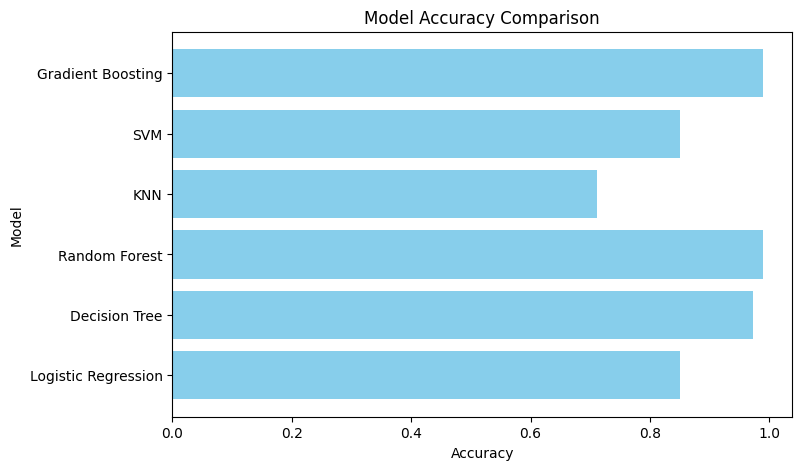

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(list(results.keys()), list(results.values()), color="skyblue")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()
